<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_1_Conna%C3%AEtre_ses_clients_K_Means_Exercice_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connaître ses clients

Une des applications les plus courantes du KMeans est d’apprendre à connaître ses clients. Prenez un dataset très simple qui est Mall Customers pour essayer de découvrir des segmentations clients.


0. Importez les librairies usuelles 

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

1. Importez votre dataset ```Mall_Customers.csv```

In [0]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.5%20--%20Machine%20Learning%20Non-Supervis%C3%A9/S5-1%20--%20KMeans/S5-1A/Exercices/datasets/Mall_Customers.csv?token=AFB53DZTHYB2ABG7AF7RI6S5URY32")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Enlevez la variable ```CustomerID``` de votre dataset 

In [0]:
X = dataset.iloc[:, 1:]
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3. Dummyfiez vos variables catégoriques 

In [0]:
X = pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

4. Nous allons construire nos clusters mais pour cela, nous avons besoin de connaître le nombre optimum de clusters dont on a besoin. Utilisez tout d'abord la méthode ```Elbow``` pour voir si on peut voir combien il nous faudra prendre comme valeur pour ```k```

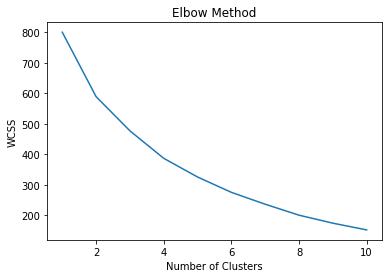

In [0]:
# Using the Elbow method to find the optimal number K of clusters
from sklearn.cluster import KMeans
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---> Difficile de voir quelque chose mais on pourrait imaginer 4 ou 5 clusters seraient idéal 

In [0]:
kmeans.cluster_centers_

array([[ 0.35421988,  1.24912183, -1.14745442, -0.88640526],
       [-0.96084556, -1.33087991,  1.17778643, -0.88640526],
       [-0.39989994,  1.01344075,  1.26040667,  1.12815215],
       [-0.97602698, -0.73705168,  0.41603773,  1.12815215],
       [-0.47793198,  0.97284787,  1.22158511, -0.88640526],
       [-0.02700694,  0.96701244, -1.39716754,  1.12815215],
       [ 1.09830638, -0.24158313, -0.04807901, -0.88640526],
       [ 0.16967696, -1.31640908, -1.1668652 , -0.7425083 ],
       [ 1.43505777, -0.45298304, -0.40195247,  1.12815215],
       [-0.78153925, -0.12214217, -0.11957041, -0.88640526]])

5. Utilisez ensuite la méthode _Silhouette_ pour voir si on peut affiner notre hypothèse pour ```k```

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X_copy = X.copy()
X = X.values

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

NameError: ignored

6. Pour la suite, nous allons prendre ```k=5``` clusters. Appliquez donc les KMeans sur votre dataset 

In [0]:
# Applying KMeans to the Mall dataset
X = pd.get_dummies(dataset.iloc[:,1:])
kmeans = KMeans(n_clusters= 5, init= "k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

7. Créeons un graphique qui nous permettra de visualiser chacun des clusters ainsi que leur centroïds. On prendra d'abord le ```Spending Score``` comme ordonnée et le ```Annual Income``` en abscisse 

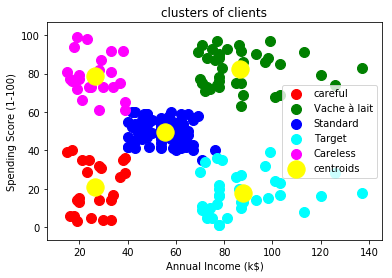

In [0]:
# Visualizing the clusters Sur Spending Score && Annual Income


plt.scatter(X.iloc[:, 1][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 1][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Vache à lait')
plt.scatter(X.iloc[:, 1][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[:, 1][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Target')
plt.scatter(X.iloc[:, 1][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

8. On a une jolie visualisation avec une belle séparation des clusters. Regardez cette fois la variable ```Age``` par rapport au ```Spending Score```. Que remarquez vous ?

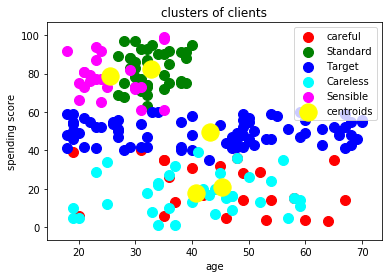

In [0]:
# Visualizing the clusters on Age + Spending Score
plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[:, 0][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('age')
plt.ylabel('spending score')
plt.legend()
plt.show()

----> Cette fois les démarquations des clusters sont moins visibles. 

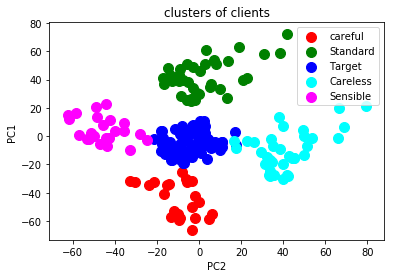

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pd.DataFrame(pca.fit_transform(X), columns = ["PC1", "PC2", "PC3"])

plt.scatter(X_pca.iloc[:, 1][y_kmeans == 0], X_pca.iloc[:, 0][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 1], X_pca.iloc[:, 0][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 2], X_pca.iloc[:, 0][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 3], X_pca.iloc[:, 0][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 4], X_pca.iloc[:, 0][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
#plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.legend()
plt.show()

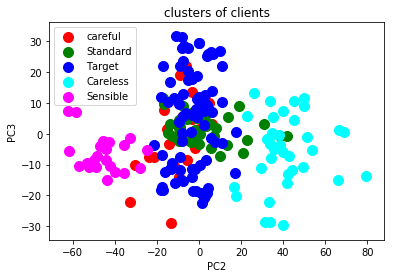

In [0]:
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 0], X_pca.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 1], X_pca.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 2], X_pca.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 3], X_pca.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 4], X_pca.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
#plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend()
plt.show()

In [0]:
pd.DataFrame(pca.components_, columns = X.columns,index=['PC1','PC2','PC3'])

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
PC1,-0.188980,0.588604,0.786022,0.000333,-0.000333
PC2,0.130958,0.808401,-0.573876,-0.001579,0.001579
PC3,0.973206,0.005512,0.229858,-0.001465,0.001465


In [0]:
pca.explained_variance_ratio_

array([0.45110884, 0.44084615, 0.1077287 ])